In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from flowvis import flow_to_color

In [3]:
def read_flow(path:str):
    """
    Optical flow maps are saved as 3-channel uint16 PNG images: The first channel
    contains the u-component, the second channel the v-component and the third
    channel denotes if a valid ground truth optical flow value exists for that
    pixel (1 if true, 0 otherwise)
    """
    # cv2 flips the order of reading channels
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED).astype(np.double)
    
    # valid channel
    valid = img[:,:,0]
    
    # get flow vectors
    u_flow = (img[:,:,2] - 2**15)/64
    v_flow = (img[:,:,1] - 2**15)/64
    
    # remove invalid flow values
    u_flow[valid == 0] = 0
    v_flow[valid == 0] = 0
    
    # return image in correct order
    return np.dstack((u_flow, v_flow, valid))

In [4]:
def plot_flow(img):
    """
    plot u and v flows along with valid pixels
    """
    fig, axes = plt.subplots(1,3, figsize=(16,8))
    images = [img[:,:,0], img[:,:,1], img[:,:,2]]
    titles = ['u_flow','v_flow','valid']
    
    for ax,image,title in zip(axes.flatten(), images, titles):
        ax.imshow(image)
        ax.set_title(title, fontsize=12)
    plt.tight_layout()
    #plt.savefig("figures_german/affinity.pdf")
    plt.show()        

In [5]:
path = "/home/adityassrana/MCV_UAB/m6-va/project/datasets/kitti/optical_flow"

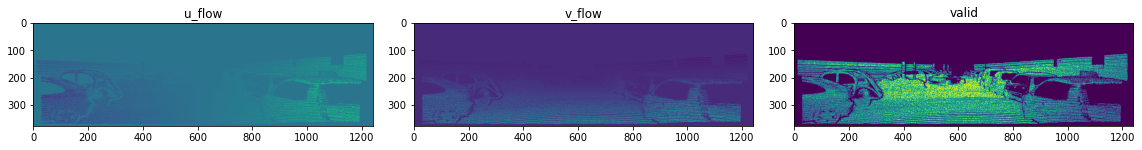

In [6]:
flow = read_flow(os.path.join(path,'gt','000045_10.png'))
plot_flow(flow)

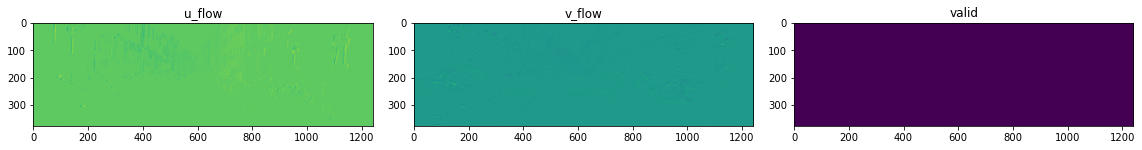

In [7]:
flow = read_flow(os.path.join(path,'results','LKflow_000045_10.png'))
plot_flow(flow)

In [9]:
def show_field(flow, gray, step=30, scale=0.5):
    
    plt.figure(figsize=(16,8))
    plt.imshow(gray, cmap='gray')
    
    U = flow[:, :, 0]
    V = flow[:, :, 1]
    H = np.hypot(U, V)

    (h, w) = flow.shape[0:2]
    x, y = np.meshgrid(np.arange(0, w), np.arange(0, h))

    x = x[::step, ::step]
    y = y[::step, ::step]
    U = U[::step, ::step]
    V = V[::step, ::step]
    H = H[::step, ::step]

    plt.quiver(x, y, U, V, H, scale_units='xy', angles='xy', scale=scale)
    
    plt.axis('off')
    plt.show()

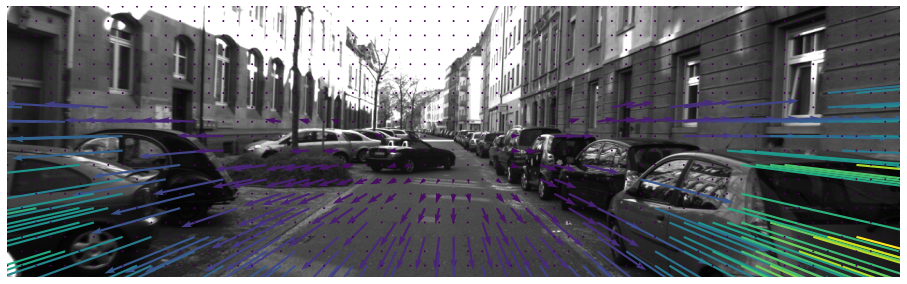

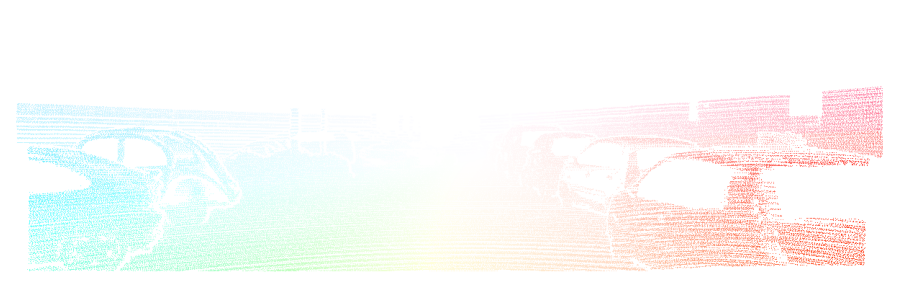

In [26]:
flow = read_flow(os.path.join(path,'gt','000045_10.png'))
gray = cv2.imread(os.path.join(path,'color','000045_10.png'), cv2.IMREAD_GRAYSCALE)
show_field(flow,gray,step=20,scale=.1)

plt.figure(figsize=(16,8))
plt.axis('off')
plt.imshow(flow_to_color(flow[:,:,:2]))
plt.show()

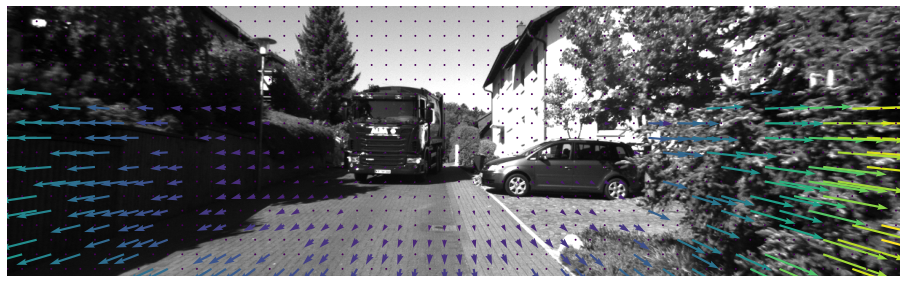

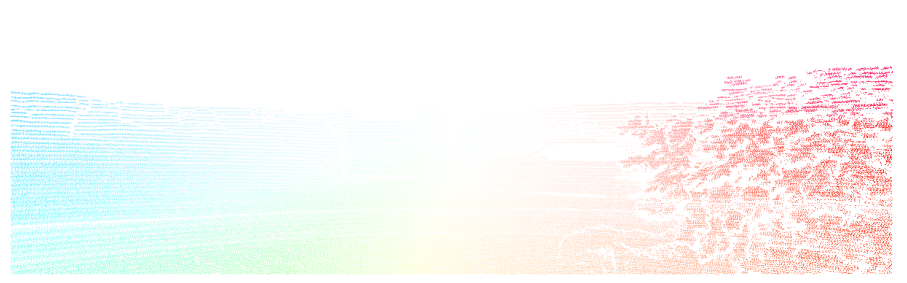

In [28]:
flow = read_flow(os.path.join(path,'gt','000157_10.png'))
gray = cv2.imread(os.path.join(path,'color','000157_10.png'), cv2.IMREAD_GRAYSCALE)

show_field(flow,gray,step=20,scale=.1)
plt.figure(figsize=(16,8))
plt.axis('off')
plt.imshow(flow_to_color(flow[:,:,:2]))
plt.show()

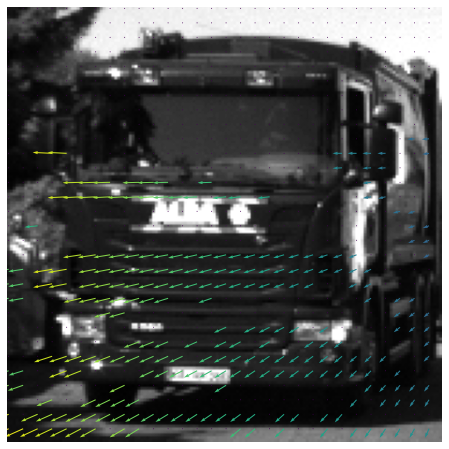

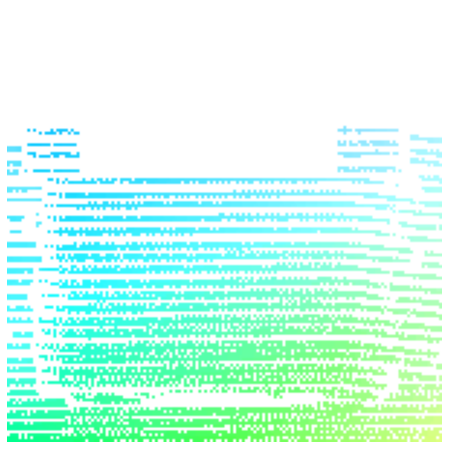

In [33]:
show_field(flow[100:250, 450:600,:],gray[100:250, 450:600],step=5,scale=0.1)

plt.figure(figsize=(16,8))
plt.axis('off')
plt.imshow(flow_to_color(flow[:,:,:2][100:250, 450:600,:]))
plt.show()